# Feature performance comparison

The purpose of this notebook is to compare the classification performance of the individual features, and their combination, for A. Thaliana

# Imports

In [93]:
from subpred.transporter_dataset import create_dataset
from subpred.eval import (
    get_independent_test_set,
    optimize_hyperparams,
    preprocess_pandas,
    models_quick_compare,
    get_confusion_matrix,
    get_classification_report,
    full_test,
    quick_test
)
from subpred.pssm import calculate_pssms_notebook
import pandas as pd
import seaborn as sns

# Dataset

In [20]:
df = create_dataset(
    keywords_substrate_filter=["Amino-acid transport", "Sugar transport"],
    keywords_component_filter=["Membrane"],
    keywords_transport_filter=["Transport"],
    input_file="../data/raw/swissprot/uniprot-reviewed_yes.tab.gz",
    multi_substrate="remove",
    outliers=["O81775", "Q9SW07", "Q9FHH5", "Q8S8A0", "Q3E965", "Q3EAV6", "Q3E8L0"],
    verbose=True,
    tax_ids_filter=[3702],
    output_log="../logs/athaliana_sugar_amino.log",
    sequence_clustering=70
)

cd-hit: clustered 165 sequences into 117 clusters at threshold 70


# Feature generation

In [21]:
labels = df.keywords_transport
labels.value_counts()

Sugar transport         84
Amino-acid transport    33
Name: keywords_transport, dtype: int64

In [22]:
df_pssm = calculate_pssms_notebook(df.sequence)
df_pssm

,AA_50_1,AR_50_1,AN_50_1,AD_50_1,AC_50_1,AQ_50_1,AE_50_1,AG_50_1,AH_50_1,AI_50_1,...,VL_90_3,VK_90_3,VM_90_3,VF_90_3,VP_90_3,VS_90_3,VT_90_3,VW_90_3,VY_90_3,VV_90_3
Uniprot,,,,,,,,,,,,,,,,,,,,,
Q9SFG0,0.784223,0.252900,0.327146,0.238979,0.394432,0.350348,0.276102,0.545244,0.227378,0.317865,...,0.434307,0.381387,0.421533,0.578467,0.357664,0.390511,0.392336,0.512774,0.656934,0.417883
Q84WN3,0.664740,0.416185,0.462428,0.427746,0.624277,0.445087,0.456647,0.526012,0.479769,0.543353,...,0.383260,0.264317,0.374449,0.726872,0.215859,0.286344,0.312775,0.493392,0.982379,0.352423
O04249,0.735484,0.286022,0.352688,0.281720,0.479570,0.352688,0.318280,0.531183,0.279570,0.417204,...,0.476898,0.415842,0.471947,0.592409,0.387789,0.415842,0.422442,0.514851,0.702970,0.450495
Q56ZZ7,0.798913,0.173913,0.217391,0.153986,0.389493,0.251812,0.190217,0.481884,0.148551,0.367754,...,0.488636,0.433442,0.472403,0.608766,0.420455,0.461039,0.462662,0.514610,0.657468,0.470779
Q8H184,0.652482,0.308511,0.372340,0.269504,0.510638,0.365248,0.301418,0.457447,0.368794,0.425532,...,0.486772,0.391534,0.473545,0.595238,0.370370,0.417989,0.431217,0.505291,0.679894,0.473545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q94B65,0.814126,0.304833,0.408922,0.271375,0.579926,0.408922,0.349442,0.516729,0.334572,0.539033,...,0.542056,0.489097,0.529595,0.716511,0.426791,0.523364,0.504673,0.613707,0.894081,0.520249
Q0WWW9,0.760736,0.388037,0.424847,0.380368,0.556748,0.412577,0.423313,0.532209,0.375767,0.469325,...,0.544582,0.465021,0.515775,0.632373,0.455418,0.486968,0.482853,0.539095,0.703704,0.514403
Q2V4B9,0.800373,0.294776,0.341418,0.298507,0.468284,0.386194,0.386194,0.537313,0.261194,0.414179,...,0.521151,0.495770,0.510998,0.566836,0.477157,0.502538,0.502538,0.509306,0.602369,0.500846


## Independent test set

In [23]:
X, y, feature_names, sample_names = preprocess_pandas(
    df_pssm, labels, return_names=True
)
(
    X_train,
    X_test,
    y_train,
    y_test,
    sample_names_train,
    sample_names_test,
) = get_independent_test_set(X, y, sample_names=sample_names, test_size=0.2)



## Model comparison

In [24]:
models_quick_compare(X_train, y_train)

,0,1,2,3,4,mean,std
est,,,,,,,
GaussianNB(),0.782,0.782,0.878,0.862,0.585,0.778,0.117
KNeighborsClassifier(),0.864,0.683,0.936,0.926,0.734,0.829,0.114
"LinearSVC(class_weight='balanced', max_iter=1000000.0)",0.878,0.864,0.887,0.875,0.875,0.876,0.008
LinearSVC(max_iter=1000000.0),0.878,0.864,0.887,0.875,0.875,0.876,0.008
RandomForestClassifier(),0.737,0.782,1.000,0.839,0.839,0.840,0.099
RandomForestClassifier(class_weight='balanced'),0.737,0.737,0.936,0.926,0.839,0.835,0.097
SGDClassifier(),0.878,0.808,0.887,0.875,0.819,0.854,0.037
SVC(),0.737,0.842,0.936,1.000,0.734,0.850,0.118
SVC(class_weight='balanced'),1.000,0.927,1.000,1.000,1.000,0.985,0.033


## Investigation of the dataset

The SVC results are surprisingly good, let's look at the data:

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

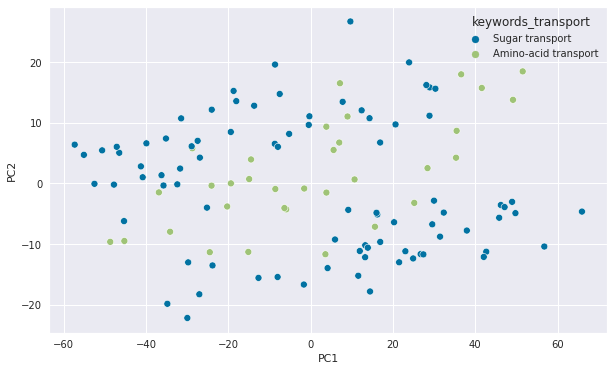

In [34]:
from subpred.plots import pca_plot_2d, pca_plot_3d

pca_plot_2d(df_pssm, labels)
# pca_plot_3d(df_pssm, labels)

It seems like sugar has higher variance in PC2. The pattern of sugar transporters having higher variance persists.

The PSSM feature encodes the likelyhood of amino acid exchanges from BLAST searches, which find proteins with similar sequences. A large number of similar proteins is available for virtually all proteins. The PSSM feature is a measure of amino acid conservation throughout evolution, not of the sequences themselves. When analyzing the amino acid composititons of the individual proteins, we found that the most important AAs are among the least frequent ones. What amino acids are the most common in the top-50 performing features?

<AxesSubplot:>

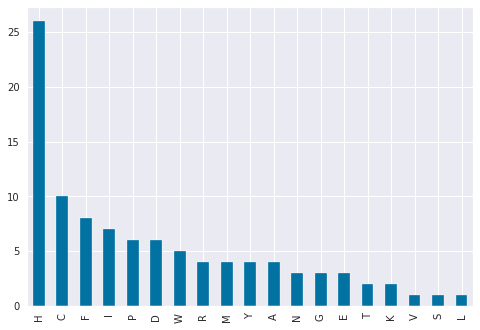

In [80]:
from subpred.plots import get_feature_score
get_feature_score(df_pssm, labels).sort_values(
    "Normalized score", ascending=False
).iloc[:50, :].Feature.apply(lambda x: [x[0], x[1]]).explode().value_counts().plot.bar()

There is a disproportionate amount of histidine exchanges among the 50 best features according to ANOVA F-score. It seems like the likelyhood of exchanging histidine during evolution is related to the class distinction between sugar and amino acid transporters. How do the actual features look like?

In [84]:
get_feature_score(df_pssm, labels).sort_values(
    "Normalized score", ascending=False
).head(20)#.Feature.apply(lambda x: [x[0], x[1]])

,Feature,Normalized score,Measure
568,HH_50_3,0.011996,Feature importance (f_classif)
564,HC_50_3,0.009336,Feature importance (f_classif)
578,HY_50_3,0.008544,Feature importance (f_classif)
577,HW_50_3,0.008169,Feature importance (f_classif)
424,RC_50_3,0.006735,Feature importance (f_classif)
724,TC_50_3,0.006594,Feature importance (f_classif)
589,II_50_3,0.006264,Feature importance (f_classif)
749,WI_50_3,0.006147,Feature importance (f_classif)
573,HF_50_3,0.006110,Feature importance (f_classif)
569,HI_50_3,0.005786,Feature importance (f_classif)


The most important feature is the Histidine-Histidine exchange rate, which is equivalent to its conservation. What is the difference in His conservation across the classes?

<AxesSubplot:xlabel='label', ylabel='HH_50_3'>

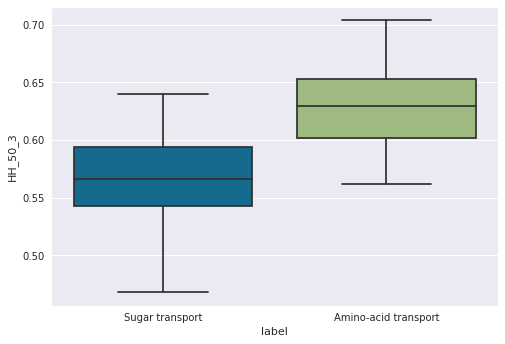

In [97]:
sugar_hh = df_pssm.loc[labels == "Sugar transport"].HH_50_3
sugar_hh = df_pssm.loc[labels == "Sugar transport"].HH_50_3

df_hh = pd.DataFrame(df_pssm.HH_50_3)
df_hh["label"] = labels

sns.boxplot(data=df_hh, x="label", y="HH_50_3")

Histidine conservation is greater in AA transporters.

I do not think that information sharing is a reason for the good results, it just seems like Histidine conservation and exchange rates are a good measure for distinguishing sugar and amino-acid transporters. 

Another interesting observation is that the top 17 features all stem from BLAST searches performed on Uniref50, with three iterations of Psiblast. These are the most distantly related proteins, but the 50% threshold of Uniref50 includes more of them. It could be that these parameters include more distantly related transporters, like splice variants for example, and therefore provide a clearer picture of the differences, especially in the His content.

Does the choice of training and validation set influence the results?

In [99]:
repetitions = 20
df_stats, _ = full_test(df_pssm, labels, repetitions=repetitions)
df_stats_gr = df_stats.groupby(["label", "dataset"], as_index=False)
print(f"mean ({repetitions} runs)")
display(df_stats_gr.mean().pivot("label", "dataset", "F1 score"))
print(f"sdev ({repetitions} runs)")
df_stats_gr.std().pivot("label", "dataset", "F1 score")

mean (20 runs)


dataset,test,train
label,,
Amino-acid transport,0.9458,0.91550
Sugar transport,0.9798,0.96965


sdev (20 runs)


dataset,test,train
label,,
Amino-acid transport,0.053032,0.040288
Sugar transport,0.018693,0.014572


The scores drop by about 5% on average with the default parameter grid, by choosing independent test splits with 20 different random_states other than the default (42). This seems more reasonable than 1.0 for almost every fold.

(Note: I finished the analysis before testing this, so the slight overfitting on the test set happened by chance.)

## Parameter tuning

In [9]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="linear",
    dim_reduction=None,
    C=[1, 10, 100],
    # feature_transformer="pssm",
    # feature_names=feature_names,
)
best_estimator_svc = gsearch


{'linearsvc__C': 100, 'linearsvc__class_weight': None, 'linearsvc__dual': False, 'linearsvc__max_iter': 100000000.0}
0.959


In [8]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="linear",
    dim_reduction=None,
    C=[1, 10, 100],
    feature_transformer="pssm",
    feature_names=feature_names,
)
best_estimator_svc = gsearch


{'linearsvc__C': 100, 'linearsvc__class_weight': None, 'linearsvc__dual': False, 'linearsvc__max_iter': 100000000.0, 'pssmselector__iterations': 1, 'pssmselector__uniref_threshold': 50}
0.959


## Dimensionality reduction

In [10]:
gsearch = optimize_hyperparams(
    X_train, y_train, kernel="linear", dim_reduction="kbest", C=[1, 10, 100]
)
best_estimator_svc_kbest = gsearch

In [9]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="linear",
    dim_reduction="pca",
    # C=[0.1, 0.01, 0.001],
    # gamma=[0.1, 0.01, 0.001],
)

{'linearsvc__C': 0.1, 'linearsvc__class_weight': 'balanced', 'linearsvc__dual': True, 'linearsvc__max_iter': 100000000.0, 'pca__n_components': 0.8}
0.907


PCA seems to perform the best, how about the RBF kernel on the lower dimensional feature set?

In [10]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="rbf",
    dim_reduction="pca",
    # C=[0.1, 0.01, 0.001],
    # gamma=[0.1, 0.01, 0.001],
)
best_estimator_svc_pca = gsearch

{'pca__n_components': 0.81, 'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.936


## Validation

### Kbest

In [11]:
get_confusion_matrix(X_test, y_test, best_estimator_svc_kbest, labels=labels)

predicted,Amino-acid transport,Sugar transport
observed,,
Amino-acid transport,6,1
Sugar transport,1,16


In [12]:
get_classification_report(X_test, y_test, best_estimator_svc_kbest, labels=labels)

,precision,recall,f1-score,support
Amino-acid transport,0.857,0.857,0.857,7
Sugar transport,0.941,0.941,0.941,17
macro avg,0.899,0.899,0.899,24
weighted avg,0.917,0.917,0.917,24


### PCA

In [13]:
get_confusion_matrix(X_test, y_test, best_estimator_svc_pca, labels=labels)

predicted,Amino-acid transport,Sugar transport
observed,,
Amino-acid transport,7,0
Sugar transport,0,17


In [14]:
get_classification_report(X_test, y_test, best_estimator_svc_pca, labels=labels)

,precision,recall,f1-score,support
Amino-acid transport,1.0,1.0,1.0,7
Sugar transport,1.0,1.0,1.0,17
macro avg,1.0,1.0,1.0,24
weighted avg,1.0,1.0,1.0,24


## Estimating validation variance

Mean and standard deviation for randomly selected training and validation sets.

In [15]:
df_scores, df_params = full_test(
    df_paac, labels, dim_reduction="pca", kernel="rbf", repetitions=10
)

In [16]:
df_scores_gr = df_scores.groupby(["label", "dataset"], as_index=False)

#### Mean F1

In [17]:
df_scores_gr.mean().pivot(index="label", columns="dataset", values="F1 score")

dataset,test,train
label,,
Amino-acid transport,0.8395,0.8818
Sugar transport,0.9394,0.9554


#### Standard deviation F1

In [18]:
df_scores_gr.std().pivot(index="label", columns="dataset", values="F1 score")

dataset,test,train
label,,
Amino-acid transport,0.081425,0.052482
Sugar transport,0.028068,0.017115


#### Parameters

In [19]:
df_params

,0,1,2,3,4,5,6,7,8,9
pca__n_components,0.81,0.8,0.82,0.8,0.88,0.97,0.9,0.85,0.88,0.8
svc__C,1,10,1,1,10,1,1,10,1,10
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__gamma,scale,scale,0.01,0.01,scale,0.01,scale,scale,0.01,scale
